In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #helps split data evenly and randomly
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
sb.set()

pd.options.display.max_rows = 999

In [3]:
life_transform=pd.read_csv("dataset/life_transform.csv")
life_transform.drop(columns=life_transform.columns[0],axis=1,inplace=True)
print("Data dimensions",life_transform.shape)
life_transform.head()

Data dimensions (2938, 21)


,COUNTRY,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,Afghanistan,1,2015.0,0.294686,0.802268,0.606280,-1.540089,-0.653537,0.317298,0.806913,...,0.616162,0.006410,0.562634,0.171717,0.0,-0.765913,0.695802,1.863475,0.215278,10.1
1,Afghanistan,1,2014.0,0.187396,0.813152,0.611111,-1.540089,-0.641558,0.293245,0.766886,...,0.621212,0.127778,0.567017,0.156566,0.0,-0.745047,-0.642920,1.881842,0.211111,10.0
2,Afghanistan,1,2013.0,0.187396,0.809070,0.615942,-1.540089,-0.643161,0.309280,0.749863,...,0.626263,0.150000,0.556038,0.166667,0.0,-0.731598,0.674292,1.896363,0.202778,9.9
3,Afghanistan,1,2012.0,0.180763,0.814512,0.623188,-1.540089,-0.617785,0.333333,0.883365,...,0.632997,0.177778,0.639925,0.181818,0.0,-0.705787,-0.011252,1.914304,0.193056,9.8
4,Afghanistan,1,2011.0,0.175788,0.818594,0.628019,-1.540089,-1.506529,0.340278,0.888946,...,0.639731,0.183333,0.497836,0.186869,0.0,-1.725140,-0.073218,1.932018,0.180556,9.5


*Updated descriptions of dataset*
>**1) Country**: Country <br>
>**2) Year**: Year in which the data is collected, ranges from `2000` to `2015`. A total of `16` years per country <br>
>**3) Status**: Whether country is developing or developed <br>
>**4) Life expectancy**: Life expectancy in age <br>
>**5) Adult Mortality**: ~Probability of dying Number~ Percentage of deaths between `15` and `60` years ~per `1000` population~. Both male and female. `(%)` <br>
>**6) Infant deaths**: ~Number~ Percentage of Infant Deaths ~per `1000` population~ `(%)` <br>
>**7) Alcohol**: Alcohol consumption (in litres of pure alcohol), per capita (15+) <br>
>**8) Percentage Expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita`(%)` <br>
>**9) Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds `(%)` <br>
>**10) Measles**: Measles - ~number~ Percentage of reported cases in population `(%)` ~per `1000` population~ <br>
>**11) BMI**: Average Body Mass Index of entire population <br>
>**12) under-five-deaths**: ~Number~ Percentage of under-five deaths in population ~per `1000` population~ `(%)`<br>
>**13) Polio**: Polio (Pol3) immunization coverage among 1-year-olds `(%)` <br>
>**14) Total expenditure**: General government expenditure on health as a percentage of total government expenditure `(%)` <br>
>**15) Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds `(%)` <br>
>**16) HIV/AIDS**: Percentage of live births who died from HIV/AIDS (0-4 years)`(%)` <br>
>**17) GDP**:Gross Domestic Product per capita (in USD) <br>
>**18) Population**: Population <br>
>**19) Thinness 5-19 years**: Prevalence of thinness among children and adolescents for Age `5` to `19` `(%)` <br>
>**20) Income composition**:Human Development Index in terms of income composition of resources (index ranging from `0` to `1`) <br>
>**21) Schooling**: Number of years of Schooling(years) <br>

In [4]:
life_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   COUNTRY                          2938 non-null   object 
 1   STATUS                           2938 non-null   int64  
 2   YEAR                             2938 non-null   float64
 3   LIFE_EXPECTANCY                  2938 non-null   float64
 4   ADULT_MORTALITY                  2938 non-null   float64
 5   INFANT_DEATHS                    2938 non-null   float64
 6   ALCOHOL                          2938 non-null   float64
 7   PERCENTAGE_EXPENDITURE           2938 non-null   float64
 8   HEPATITIS_B                      2938 non-null   float64
 9   MEASLES                          2938 non-null   float64
 10  BMI                              2938 non-null   float64
 11  UNDER_FIVE_DEATHS                2938 non-null   float64
 12  POLIO               

## Data spliting

To prevent overfitting on the train set leading to reduced accuracy on the test set, we will need to split the data into `TRAIN` and `TEST` before doing any form of feature selection. We split the data as early on as possible to prevent test data from contaminating our model during training.

In [5]:
# Extract Response and Predictors
y = pd.DataFrame(life_transform['LIFE_EXPECTANCY'])
X = pd.DataFrame(life_transform.loc[:,~life_transform.columns.isin(['COUNTRY','LIFE_EXPECTANCY'])])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0) # set the seed so its reproduceable
# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (2350, 19) (2350, 1)
Test Set  : (588, 19) (588, 1)


## Random Forest Regression

This is taken from the same model in regression.ipynb and is chosen for being the most accurate model we have. We will now attempt to improve it further by doing K-Means clustering.

In [6]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import plot_tree

### Model Random Forest Regression

In [7]:
regressor=RandomForestRegressor(n_estimators=1000,random_state=42)
regressor.fit(X_train,y_train.values.ravel())

RandomForestRegressor(n_estimators=1000, random_state=42)

### Check Output

In [8]:
y_train_pred=regressor.predict(X_train)
y_test_pred=regressor.predict(X_test)
y_train_pred=pd.DataFrame(y_train_pred,columns=['yPredict'])
y_test_pred=pd.DataFrame(y_test_pred,columns=['yPredict'])

### Scatter Plot

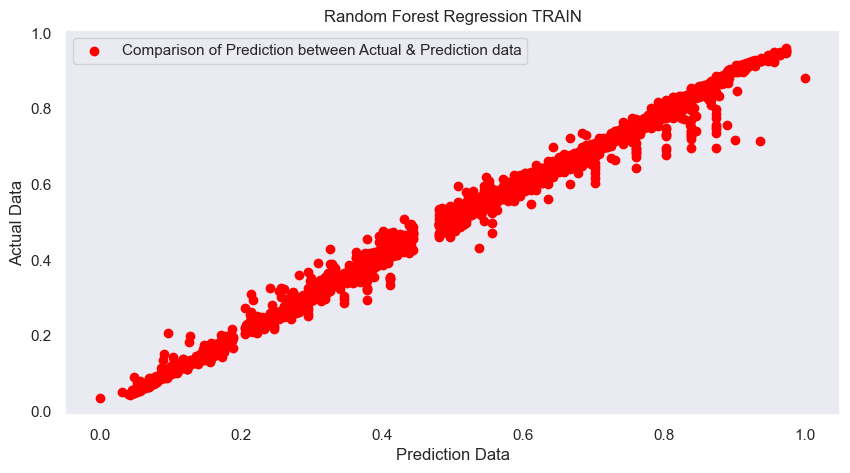

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(y_train,y_train_pred,color='red', label='Comparison of Prediction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression TRAIN')
plt.xlabel('Prediction Data')
plt.ylabel('Actual Data')
plt.show()

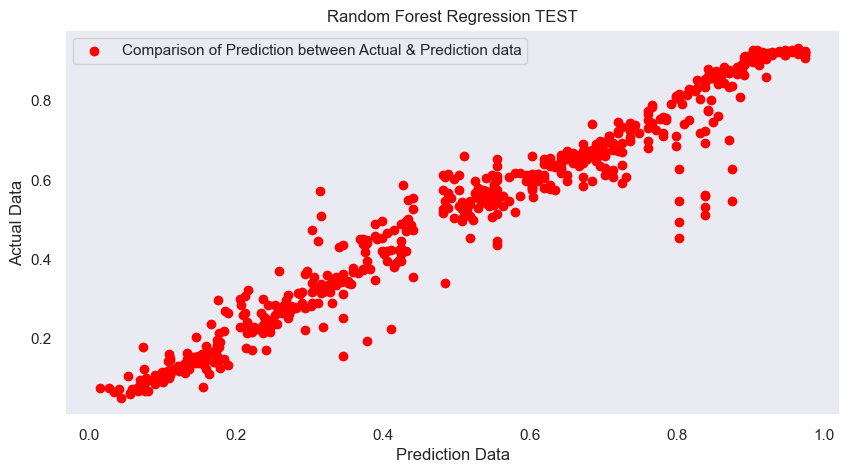

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_test_pred,color='red', label='Comparison of Prediction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression TEST')
plt.xlabel('Prediction Data')
plt.ylabel('Actual Data')
plt.show()

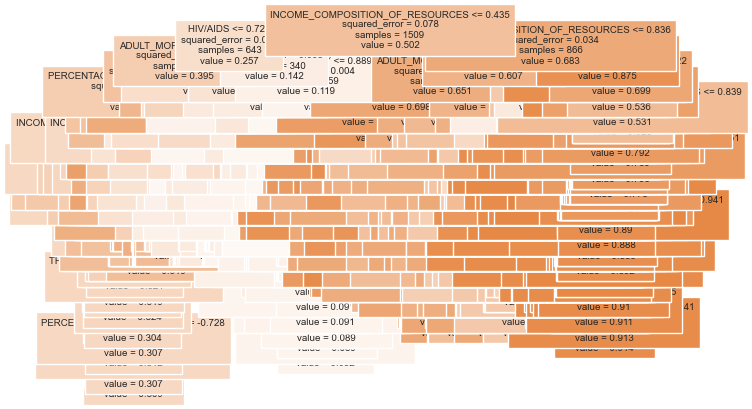

In [11]:
plot_tree(regressor.estimators_[0],
              filled = True,
              feature_names=X_train.columns,
              fontsize=7)
plt.show()

In [12]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

KfoldScore=cross_val_score(regressor, X_train, y_train.values.ravel(), cv=5).mean()
print('K-fold Cross validation score:',KfoldScore)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.993193878042767
Mean Squared Error (MSE) 	: 0.0005228169122838819

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.954850927572075
Mean Squared Error (MSE) 	: 0.0036008767684756727

K-fold Cross validation score: 0.9393676683457644


### evaluating machine learning model predictions

To help us better evaluate the accuracy of our models and easily visualize the predictions done by model, we will create a function that plots the predicted values of `LIFE_EXPECTANCY` given by the model vs the actual `LIFE_EXPECTANCY`. We will do this for a sample country, Singapore.

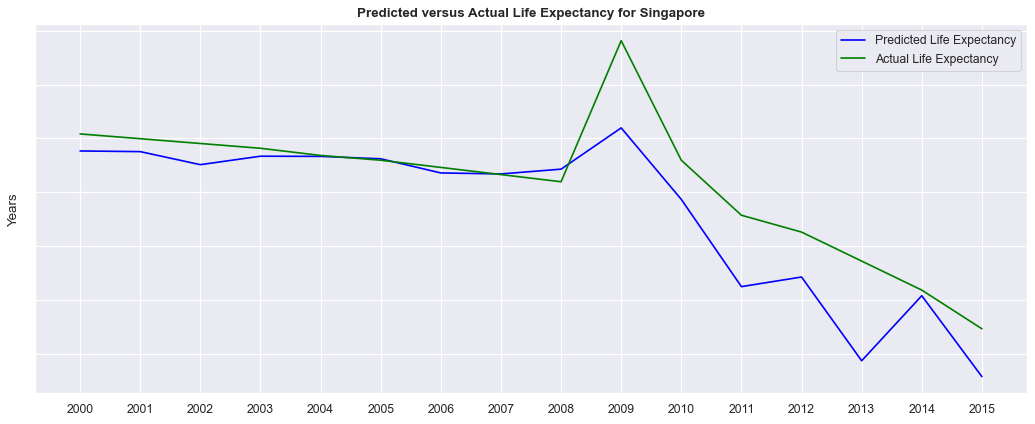

In [13]:
y_pred=life_transform[life_transform['COUNTRY']=='Singapore']['LIFE_EXPECTANCY'] #response variable
y_pred=pd.DataFrame(y_pred)
x_pred=life_transform[life_transform.columns[life_transform.columns!='LIFE_EXPECTANCY']] #predicting variables 
x_pred=x_pred[x_pred["COUNTRY"]=='Singapore']
x_pred.drop(['COUNTRY'],axis=1,inplace=True)


country_preds = regressor.predict(x_pred)

# plot predicted against actual
year = [x for x in range(2000,2016)]
plt.figure(figsize=(16, 6), dpi=80)
plt.plot(year, country_preds, label = "Predicted Life Expectancy", color='blue')
plt.plot(year, y_pred, label = "Actual Life Expectancy", color='green')
plt.xticks(year)
plt.ylabel("Years")
plt.title("Predicted versus Actual Life Expectancy for Singapore", fontweight="bold")
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.legend()
plt.show()

# K-Means Clustering

K means clustering is an unsupervised machine learning method which aims to cluster data points which are not explicitly labelled, thus we are treating our features as unlabelled and using the clusters to see if it will improve on our current Random Forest Regression Model.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [15]:
scaler= StandardScaler()

We are making a copy of our data and transforming the copy and doing clustering on the copy to obtain the clusters. Copying ensures the original data we are supposed to perform regression on is not affected.

In [16]:
life_transform_copy=life_transform.copy(deep=True)
life_transform_copy[['LIFE_EXPECTANCY_T',
             'ADULT_MORTALITY_T',
             'INFANT_DEATHS_T',
             'ALCOHOL_T',
             'PERCENTAGE_EXPENDITURE_T',
             'HEPATITIS_B_T',
             'MEASLES_T',
             'BMI_T',
             'UNDER_FIVE_DEATHS_T',
             'POLIO_T',
             'TOTAL_EXPENDITURE_T',
             'DIPHTHERIA_T',
             'HIV/AIDS_T',
             'GDP_T',
             'POPULATION_T',
             'THINNESS_5_to_19_YEARS_T',
             'INCOME_COMPOSITION_OF_RESOURCES_T',
             'SCHOOLING_T']]=scaler.fit_transform(life_transform_copy[['LIFE_EXPECTANCY',
                                                         'ADULT_MORTALITY',
                                                         'INFANT_DEATHS',
                                                         'ALCOHOL',
                                                         'PERCENTAGE_EXPENDITURE',
                                                         'HEPATITIS_B',
                                                         'MEASLES',
                                                         'BMI',
                                                         'UNDER_FIVE_DEATHS',
                                                         'POLIO',
                                                         'TOTAL_EXPENDITURE',
                                                         'DIPHTHERIA',
                                                         'HIV/AIDS',
                                                         'GDP',
                                                         'POPULATION',
                                                         'THINNESS_5_to_19_YEARS',
                                                         'INCOME_COMPOSITION_OF_RESOURCES',
                                                         'SCHOOLING']])

In [17]:
life_transform_copy_num=life_transform_copy.drop(['COUNTRY','STATUS'],axis=1)

In [18]:
life_transform_copy_num

,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,...,UNDER_FIVE_DEATHS_T,POLIO_T,TOTAL_EXPENDITURE_T,DIPHTHERIA_T,HIV/AIDS_T,GDP_T,POPULATION_T,THINNESS_5_to_19_YEARS_T,INCOME_COMPOSITION_OF_RESOURCES_T,SCHOOLING_T
0,2015.0,0.294686,0.802268,0.606280,-1.540089,-0.653537,0.317298,0.806913,19.1,0.616162,...,0.444814,-1.661691,0.562634,-1.118386,-0.794234,-0.765913,0.695802,1.863475,-0.994979,-0.614119
1,2014.0,0.187396,0.813152,0.611111,-1.540089,-0.641558,0.293245,0.766886,18.6,0.621212,...,0.461894,-1.261026,0.567017,-1.169130,-0.794234,-0.745047,-0.642920,1.881842,-1.009602,-0.641527
2,2013.0,0.187396,0.809070,0.615942,-1.540089,-0.643161,0.309280,0.749863,18.1,0.626263,...,0.478974,-1.187665,0.556038,-1.135300,-0.794234,-0.731598,0.674292,1.896363,-1.038850,-0.668935
3,2012.0,0.180763,0.814512,0.623188,-1.540089,-0.617785,0.333333,0.883365,17.6,0.632997,...,0.501747,-1.095963,0.639925,-1.084556,-0.794234,-0.705787,-0.011252,1.914304,-1.072971,-0.696343
4,2011.0,0.175788,0.818594,0.628019,-1.540089,-1.506529,0.340278,0.888946,17.2,0.639731,...,0.524521,-1.077623,0.497836,-1.067641,-0.794234,-1.725140,-0.073218,1.932018,-1.116842,-0.778567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,0.046784,1.000000,0.484848,0.149101,1.081648,0.340278,0.547009,27.1,0.534188,...,0.167594,-1.095963,0.321024,-1.118386,1.672388,-0.876123,0.368261,1.109933,-1.345945,-0.860791
2934,2003.0,0.047953,0.997757,0.479798,0.088457,1.061102,0.018072,0.799610,26.7,0.529915,...,0.153142,-1.654637,0.161034,-1.067641,1.691347,-0.877103,0.364611,1.166410,-1.292325,-0.778567
2935,2002.0,0.049708,0.248889,0.474747,0.162786,-2.312958,0.375000,0.715266,26.3,0.525641,...,0.138689,-0.985921,0.163773,-1.016897,1.710307,-1.768514,-0.857872,-0.981848,-1.248454,-0.641527
2936,2001.0,0.052632,0.989627,0.474747,-0.554276,-2.312958,0.395833,0.777046,25.9,0.521368,...,0.124237,-0.912560,0.059581,-0.949238,1.724374,-0.793556,0.357704,-0.744249,-1.248454,-0.696343


## K-Means Multiple Clusters exploration

We will first explore and visualize K-Means clustering using only 2 features, `ADULT_MORTALITY_T`, and `BMI_T` and seeing how the effect of changing the number of clusters, K affects the data.

In [19]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(life_transform_copy_num[['BMI_T','ADULT_MORTALITY_T']])

KMeans(n_clusters=3)

In [20]:
for k in range(1,6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(life_transform_copy_num[['BMI_T','ADULT_MORTALITY_T']])
    life_transform_copy_num[f'KMeans_{k}']=kmeans.labels_

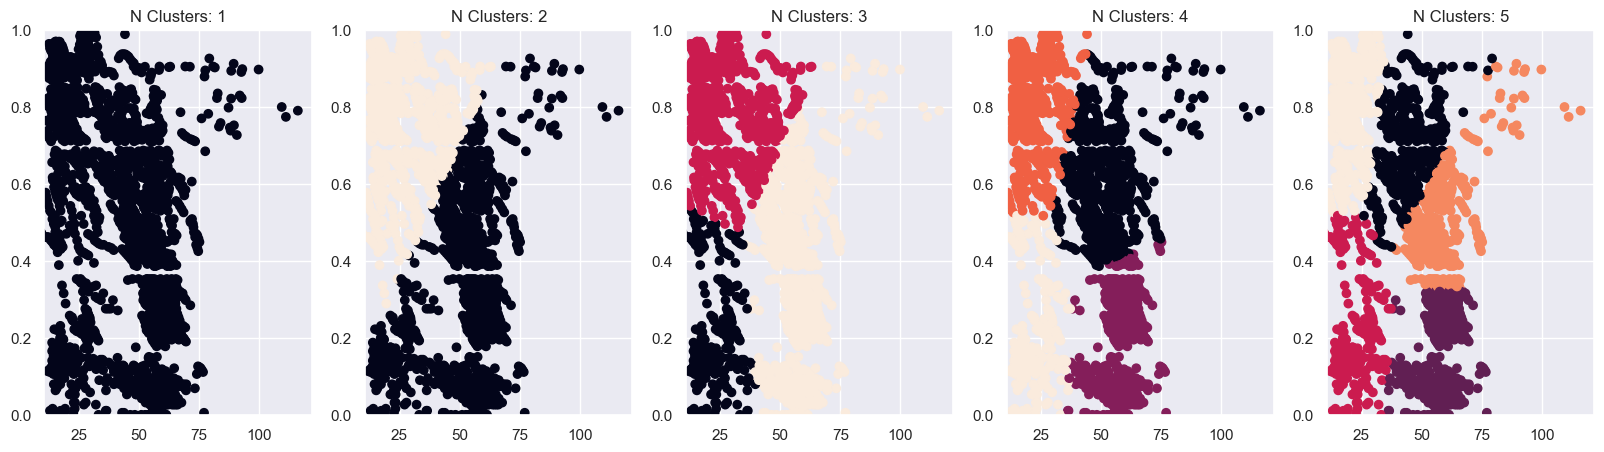

In [35]:
fig,axs=plt.subplots(nrows=1,ncols=5,figsize=(20,5))
for i,ax in enumerate(fig.axes, start=1):
    ax.scatter(x=life_transform_copy_num['BMI'],y=life_transform_copy_num['ADULT_MORTALITY'],c=life_transform_copy_num[f'KMeans_{i}'])
    ax.set_xlim(10.70)
    ax.set_ylim(0,1)
    ax.set_title(f'N Clusters: {i}')

## K-Means Cluster Optimization for Random Forest Regression

we will now be finding out the optimum number of clusters, K, for our data.

In [22]:
def optimise_k_means(data,max_k):
    means=[]
    inertias=[]
    
    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k,random_state=0)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    fig=plt.subplots(figsize=(10,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

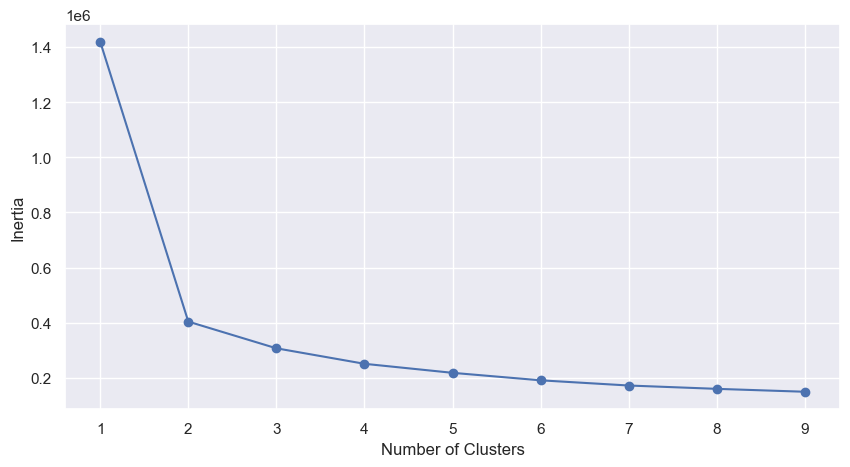

In [23]:
optimise_k_means(life_transform_copy_num,10)

As seen, there is a sharp decrease in Inertia as the K value goes from `1` to `2` and it roughly plataeus after **K=3.** Therefore our optimum K will be `3`. After finding out the cluster numbers we will append the cluster numbers as a feature in the **original** `life_transform` dataframe, before doing performing Random Forest Regression Again.

In [24]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(life_transform_copy_num)

#append col on original dataframe
life_transform['kmeans_3']=kmeans.labels_

In [25]:
life_transform

,COUNTRY,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING,kmeans_3
0,Afghanistan,1,2015.0,0.294686,0.802268,0.606280,-1.540089,-0.653537,0.317298,0.806913,...,0.006410,0.562634,0.171717,0.000000,-0.765913,0.695802,1.863475,0.215278,10.1,1
1,Afghanistan,1,2014.0,0.187396,0.813152,0.611111,-1.540089,-0.641558,0.293245,0.766886,...,0.127778,0.567017,0.156566,0.000000,-0.745047,-0.642920,1.881842,0.211111,10.0,1
2,Afghanistan,1,2013.0,0.187396,0.809070,0.615942,-1.540089,-0.643161,0.309280,0.749863,...,0.150000,0.556038,0.166667,0.000000,-0.731598,0.674292,1.896363,0.202778,9.9,1
3,Afghanistan,1,2012.0,0.180763,0.814512,0.623188,-1.540089,-0.617785,0.333333,0.883365,...,0.177778,0.639925,0.181818,0.000000,-0.705787,-0.011252,1.914304,0.193056,9.8,1
4,Afghanistan,1,2011.0,0.175788,0.818594,0.628019,-1.540089,-1.506529,0.340278,0.888946,...,0.183333,0.497836,0.186869,0.000000,-1.725140,-0.073218,1.932018,0.180556,9.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,1,2004.0,0.046784,1.000000,0.484848,0.149101,1.081648,0.340278,0.547009,...,0.177778,0.321024,0.171717,0.959553,-0.876123,0.368261,1.109933,0.115278,9.2,1
2934,Zimbabwe,1,2003.0,0.047953,0.997757,0.479798,0.088457,1.061102,0.018072,0.799610,...,0.008547,0.161034,0.186869,0.966928,-0.877103,0.364611,1.166410,0.130556,9.5,1
2935,Zimbabwe,1,2002.0,0.049708,0.248889,0.474747,0.162786,-2.312958,0.375000,0.715266,...,0.211111,0.163773,0.202020,0.974304,-1.768514,-0.857872,-0.981848,0.143056,10.0,1
2936,Zimbabwe,1,2001.0,0.052632,0.989627,0.474747,-0.554276,-2.312958,0.395833,0.777046,...,0.233333,0.059581,0.222222,0.979776,-0.793556,0.357704,-0.744249,0.143056,9.8,1


In [43]:
life_transform['kmeans_3'].value_counts()

0    1162
1    1154
2     622
Name: kmeans_3, dtype: int64

# Random Forest Regression with K-Means clustering augmented column

#### Data spliting

To prevent overfitting on the train set leading to reduced accuracy on the test set, we will need to split the data into `TRAIN` and `TEST` before doing any form of feature selection. We split the data as early on as possible to prevent test data from contaminating our model during training.

In [26]:
# Extract Response and Predictors
y = pd.DataFrame(life_transform['LIFE_EXPECTANCY'])
X = pd.DataFrame(life_transform.loc[:,~life_transform.columns.isin(['COUNTRY','LIFE_EXPECTANCY'])])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0) # set the seed so its reproduceable
# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (2350, 20) (2350, 1)
Test Set  : (588, 20) (588, 1)


#### Random Forest Regression

In [27]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import plot_tree

#### Model Random Forest Regression

In [28]:
regressor=RandomForestRegressor(n_estimators=1000,random_state=42)
regressor.fit(X_train,y_train.values.ravel())

RandomForestRegressor(n_estimators=1000, random_state=42)

#### Check Output

In [29]:
y_train_pred=regressor.predict(X_train)
y_test_pred=regressor.predict(X_test)
y_train_pred=pd.DataFrame(y_train_pred,columns=['yPredict'])
y_test_pred=pd.DataFrame(y_test_pred,columns=['yPredict'])

#### Scatter Plot

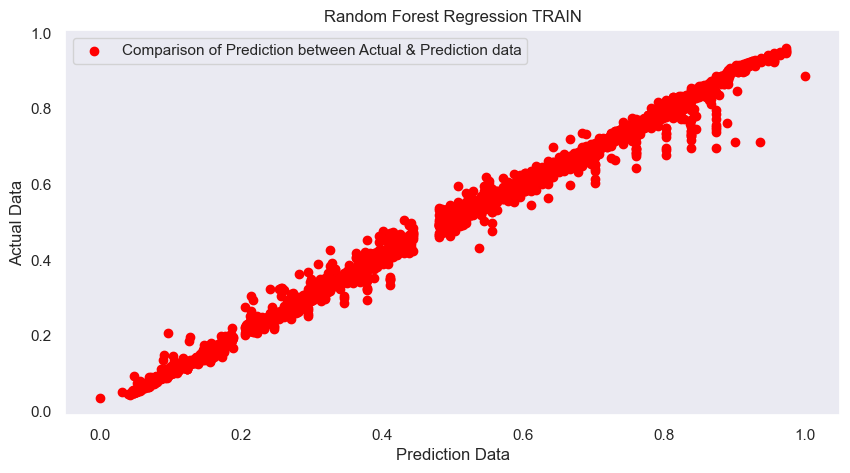

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(y_train,y_train_pred,color='red', label='Comparison of Prediction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression TRAIN')
plt.xlabel('Prediction Data')
plt.ylabel('Actual Data')
plt.show()

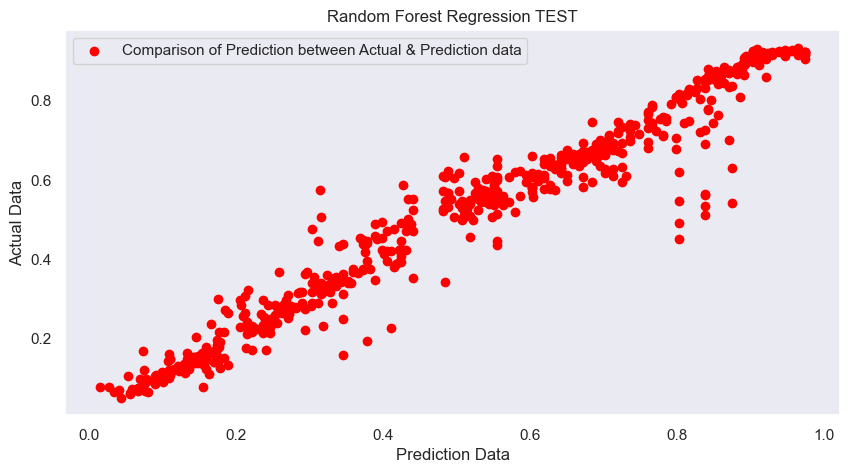

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_test_pred,color='red', label='Comparison of Prediction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression TEST')
plt.xlabel('Prediction Data')
plt.ylabel('Actual Data')
plt.show()

In [32]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

KfoldScore=cross_val_score(regressor, X_train, y_train.values.ravel(), cv=5).mean()
print('K-fold Cross validation score:',KfoldScore)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9932086261038789
Mean Squared Error (MSE) 	: 0.0005216840298846003

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9546950384428813
Mean Squared Error (MSE) 	: 0.003613309749123677

K-fold Cross validation score: 0.9392056502569162


#### evaluating machine learning model predictions

To help us better evaluate the accuracy of our models and easily visualize the predictions done by model, we will create a function that plots the predicted values of `LIFE_EXPECTANCY` given by the model vs the actual `LIFE_EXPECTANCY`. We will do this for a sample country, Singapore.

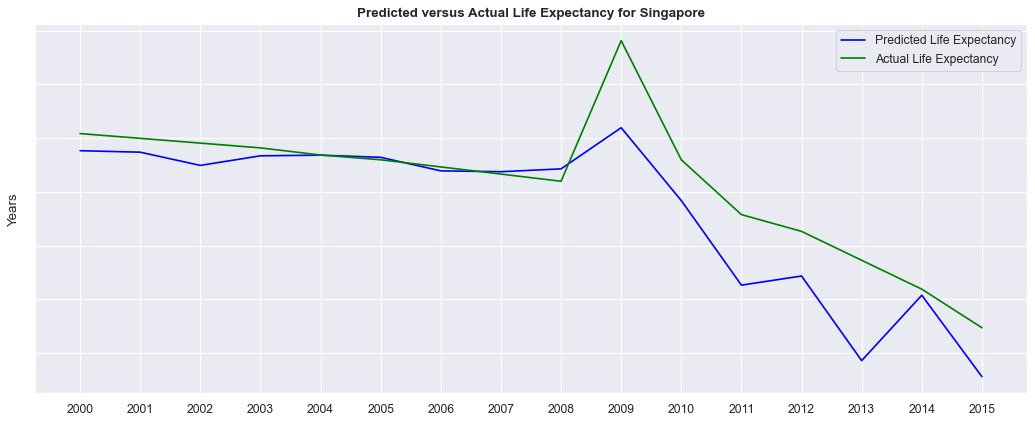

In [33]:
y_pred=life_transform[life_transform['COUNTRY']=='Singapore']['LIFE_EXPECTANCY'] #response variable
y_pred=pd.DataFrame(y_pred)
x_pred=life_transform[life_transform.columns[life_transform.columns!='LIFE_EXPECTANCY']] #predicting variables 
x_pred=x_pred[x_pred["COUNTRY"]=='Singapore']
x_pred.drop(['COUNTRY'],axis=1,inplace=True)


country_preds = regressor.predict(x_pred)

# plot predicted against actual
year = [x for x in range(2000,2016)]
plt.figure(figsize=(16, 6), dpi=80)
plt.plot(year, country_preds, label = "Predicted Life Expectancy", color='blue')
plt.plot(year, y_pred, label = "Actual Life Expectancy", color='green')
plt.xticks(year)
plt.ylabel("Years")
plt.title("Predicted versus Actual Life Expectancy for Singapore", fontweight="bold")
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.legend()
plt.show()

# Conclusion

There is no noticeable further improvement in accuracy and performance of the model. There is really **no distinguishable difference** in R^2 value of our Random Forest Regression Model with K-Means Clustering Augmented Data. However this does not mean K-Mean clustering is ineffective, one reason for this lack of further improvement could be that our model already has high level of accuracy and is hard to improve upon. However K-Means clustering when used with regression models with lower levels of accuracy and R^2, could potentially lead to better results.

Therefore, we will end our exploration here and conclude that this Random Forest Regression Model is the best model we have to predict `LIFE_EXPECTANCY` to a high degree of accuracy. Thank you.